In [2]:
from skimage import data
import skimage
from skimage import color
import matplotlib.pyplot as plt
import numpy as np

image=data.photo()

grayscale = color.rgb2gray(original)
rgb=color.gray2rgb(grayscale)


def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image,cmap=cmap_type)
    plt.title(title)
    plt.axis("off")
    plt.show()
    
show_image(grayscale,"Grayscale")

In [3]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image,cmap=cmap_type)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [4]:
panda=plt.imread('photo.jpg')

In [5]:
type(panda)

numpy.ndarray

In [6]:
red=panda[:,:,0]
green=panda[:,:,1]
blue=panda[:,:,2]

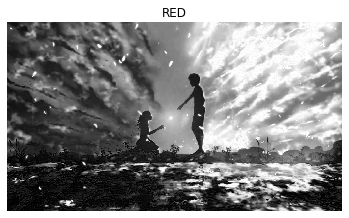

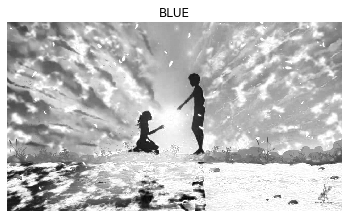

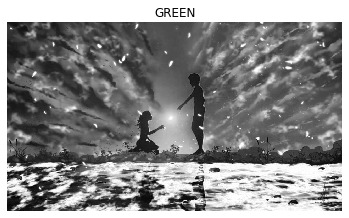

In [7]:
plt.imshow(red,cmap="gray")
plt.title("RED")
plt.axis("off")
plt.show()

plt.imshow(blue,cmap="gray")
plt.title("BLUE")
plt.axis("off")
plt.show()


plt.imshow(green,cmap="gray")
plt.title("GREEN")
plt.axis("off")
plt.show()




In [8]:
panda.shape

(720, 1280, 3)

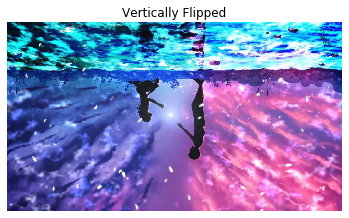

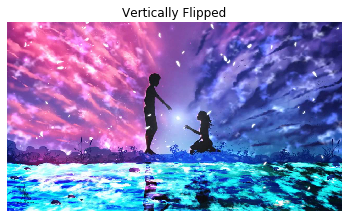

In [9]:
#FLIP VERTICALLY
vertically_flipped=np.flipud(panda)
show_image(vertically_flipped,'Vertically Flipped')

#FLIP HORIZONTALLY
vertically_flipped=np.fliplr(panda)
show_image(vertically_flipped,'Vertically Flipped')



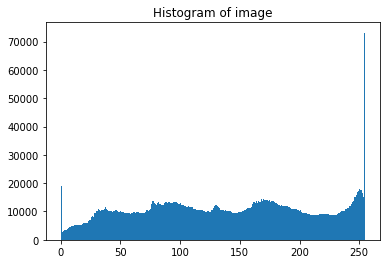

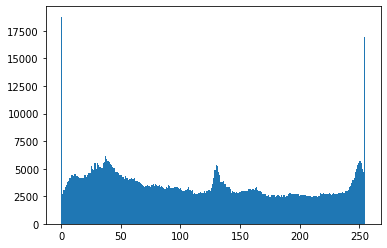

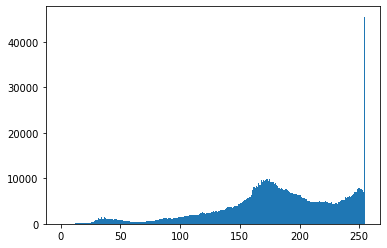

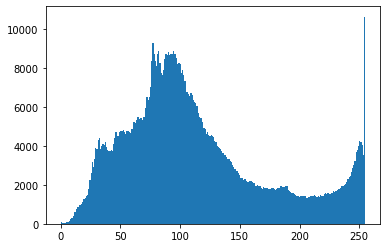

In [10]:
#HISTOGRAMS
plt.title('Histogram of image')
plt.hist(panda.ravel(), bins=256)
plt.show()


plt.hist(red.ravel(),bins=256)
plt.show()

plt.hist(blue.ravel(),bins=256)
plt.show()


plt.hist(green.ravel(),bins=256)
plt.show()

#left is more intense color


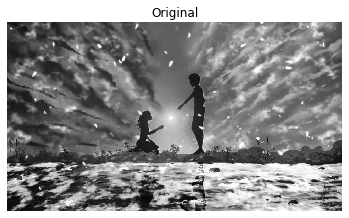

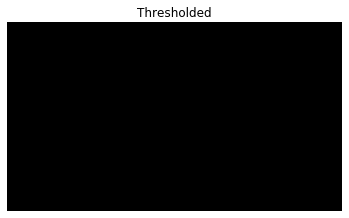

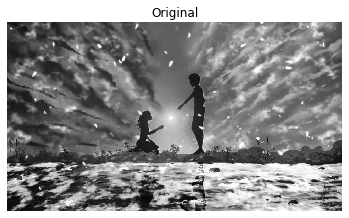

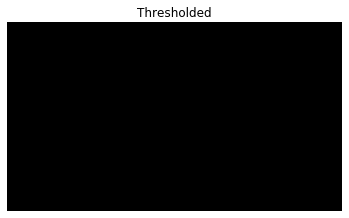

In [11]:
#THRESHOLD
photo=color.rgb2gray(panda)
thresh=127
binary=photo>thresh

show_image(photo,'Original')
show_image(binary, 'Thresholded')


binary1=photo<=thresh
show_image(photo,'Original')
show_image(binary1, 'Thresholded')



In [13]:
from skimage.filters import try_all_threshold
#fig,ax=try_all_threshold(image,verbose=False)

#plt.show(fig,ax)

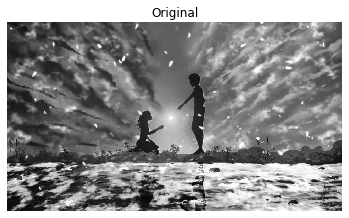

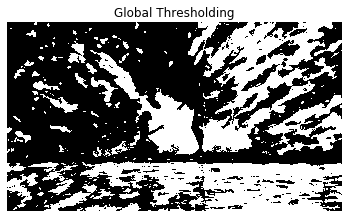

In [14]:
from skimage.filters import threshold_otsu

# GLOBAL THRESHOLD FOR EVEN BACKGROUND
thresh=threshold_otsu(photo)
binary_global=photo>thresh

show_image(photo,'Original')
show_image(binary_global,'Global Thresholding')

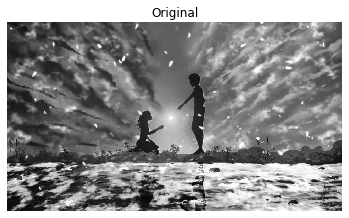

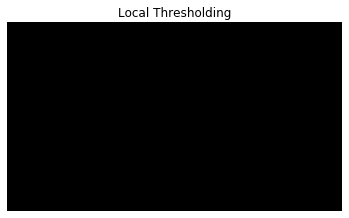

In [15]:
from skimage.filters import threshold_local

#LOCAL THRESHOLD FOR UNEVEN BACKGROUND
block_size= 35
local_thresh=threshold_local(photo,block_size,offset=10)

binary_local=photo>local_thresh

show_image(photo,'Original')
show_image(binary_local,'Local Thresholding')
                             

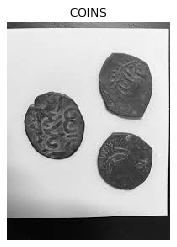

In [16]:
#Filters
coins=plt.imread('Coins.jpg')
coins=color.rgb2gray(coins)
show_image(coins,"COINS")

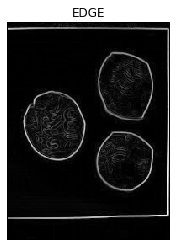

In [17]:
from skimage.filters import sobel
#2D grayscale image as input
#EDGE
edge_sobel=sobel(coins)

show_image(edge_sobel,"EDGE")

In [18]:
def plot_comparison(original, filtered, title_filtered):
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(8,6),sharex=True,sharey=True)
    ax1.imshow(original,cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

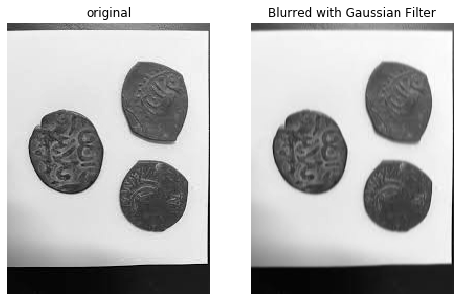

In [19]:
#Gaussian Smoothing

from skimage.filters import gaussian

gaussian_image=gaussian(coins,multichannel=True)

plot_comparison(coins,gaussian_image,"Blurred with Gaussian Filter")

/Users/pranavmanjunath/opt/anaconda3/lib/python3.7/site-packages/skimage/exposure/exposure.py:124: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


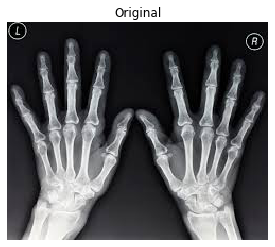

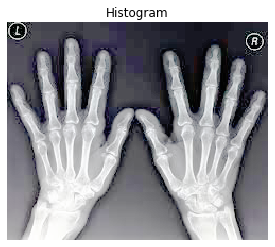

/Users/pranavmanjunath/opt/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]
/Users/pranavmanjunath/opt/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


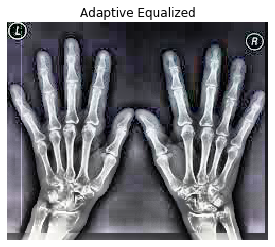

In [20]:
#Contrast
from skimage import exposure
xray=plt.imread('xray.jpg')

xray_eq=exposure.equalize_hist(xray)

show_image(xray,'Original')
show_image(xray_eq,'Histogram')

#Adaptive Equalization

xray_adap=exposure.equalize_adapthist(xray,clip_limit=0.03)
show_image(xray_adap,'Adaptive Equalized')

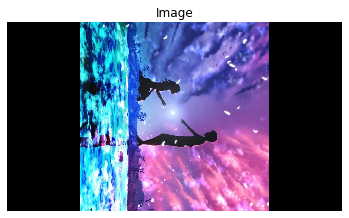

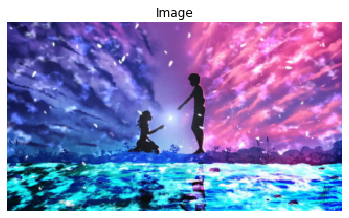

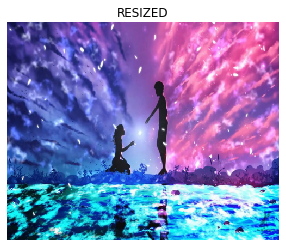

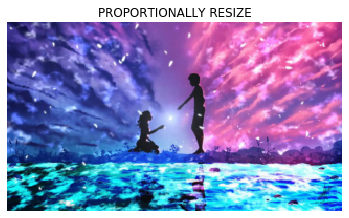

In [21]:
#Transformation
from skimage.transform import rotate

#-90 is clockwise
image_rotated=rotate(panda,-90)
show_image(image_rotated)

#Rescaling
from skimage.transform import rescale
image_rescaled=rescale(panda,1/4,anti_aliasing=True,multichannel=True)

show_image(image_rescaled)

#Aliasing - Rippling Effect
from skimage.transform import resize

#Resize

height=400
width=500

image_resized= resize(panda,(height,width),anti_aliasing=True)

show_image(image_resized,"RESIZED")


#Resize with proportion
height1=panda.shape[0]/4
width1=panda.shape[1]/4

image_prosized=resize(panda,(height1,width1),anti_aliasing=True)

show_image(image_prosized,"PROPORTIONALLY RESIZE")

In [22]:
#Morphology
# - better in binary images and can extend for grayscale

from skimage import morphology

square=morphology.square(4)
rectangle=morphology.rectangle(2,2)

#erosion

horse=plt.imread('horse.jpg')

selem=morphology.rectangle(2,1)
eroded_image=morphology.binary_erosion(horse)
dilated_image=morphology.binary_dilation(horse)
                                       

#show_image(eroded_image)
#plot_comparison(horse,eroded_image, 'Erosion')


In [ ]:
#Image Restoration
